# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [148]:
heroes_df = pd.read_csv('heroes_information.csv', index_col=0)
powers_df = pd.read_csv('super_hero_powers.csv')

In [149]:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [150]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [151]:
#see above in load

## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [152]:
print('hero_dim:', heroes_df.shape)
print('power_dim:', powers_df.shape)
print('hero_col:', heroes_df.columns)
print('power_col:', powers_df.columns)

hero_dim: (734, 10)
power_dim: (667, 168)
hero_col: Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')
power_col: Index(['hero_names', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=168)


In [153]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [154]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Hawkeye,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

1. Check for missing values & apply fix
2. Check for Duplicates & apply fix
3. Check for abnormalities & apply fix


Starting With The Heros DF:

In [155]:
heroes_df.isna().sum()
# of 734 15 and 2 missint values for publisher and weight are minimal and therefore can be replaced with NA and median

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [156]:

heroes_df['Weight'] = heroes_df['Weight'].fillna(heroes_df['Weight'].median())
heroes_df['Publisher'] = heroes_df['Publisher'].fillna('NA')
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [158]:
#Checking for duplicates
duplicates = heroes_df[heroes_df.duplicated()]
duplicates

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
291,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0


In [159]:
heroes_df.shape

(734, 10)

In [160]:
#since there is only one duplicate I will remove said row
#hero_df = hero_df.drop([291])
#OR
# Drop duplicate names
heroes_df.drop_duplicates(subset='name', inplace=True)
# Reset index values
heroes_df.reset_index(drop=True, inplace=True)

In [161]:
#checking for extraneous values
for col in heroes_df.columns:
    print(col, '\n', heroes_df[col].value_counts(normalize=True).head(), '\n\n')
    


name 
 Hawkeye             0.001399
Valkyrie            0.001399
Sauron              0.001399
Black Cat           0.001399
Mister Fantastic    0.001399
Name: name, dtype: float64 


Gender 
 Male      0.686713
Female    0.274126
-         0.039161
Name: Gender, dtype: float64 


Eye color 
 blue     0.307692
-        0.230769
brown    0.174825
green    0.099301
red      0.062937
Name: Eye color, dtype: float64 


Race 
 -                    0.419580
Human                0.278322
Mutant               0.088112
God / Eternal        0.018182
Human / Radiation    0.015385
Name: Race, dtype: float64 


Hair color 
 -          0.232168
Black      0.215385
Blond      0.135664
Brown      0.114685
No Hair    0.104895
Name: Hair color, dtype: float64 


Height 
 -99.0     0.292308
 183.0    0.082517
 188.0    0.068531
 180.0    0.053147
 178.0    0.051748
Name: Height, dtype: float64 


Publisher 
 Marvel Comics        0.530070
DC Comics            0.288112
NBC - Heroes         0.026573
Dark Hors

In [162]:
#fixing name column
heroes_df['name'] = heroes_df['name'].apply(lambda x: x.strip())

Next The Powers DF

In [163]:
powers_df.rename(columns={'hero_names':'name'}, inplace=True)

In [164]:
#checking for na
sorted(powers_df.isna().sum())[0]
sorted(powers_df.isna().sum())[-1]

0

In [165]:
#Checking for duplicates
duplicates = powers_df[powers_df.duplicated()]
duplicates

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient


In [166]:
#checking for extraneous values
for col in powers_df.columns:
    print(col, '\n', powers_df[col].value_counts(normalize=True).head(), '\n\n')

name 
 Hawkeye     0.001499
Arclight    0.001499
Ink         0.001499
Magneto     0.001499
Cat         0.001499
Name: name, dtype: float64 


Agility 
 False    0.637181
True     0.362819
Name: Agility, dtype: float64 


Accelerated Healing 
 False    0.733133
True     0.266867
Name: Accelerated Healing, dtype: float64 


Lantern Power Ring 
 False    0.983508
True     0.016492
Name: Lantern Power Ring, dtype: float64 


Dimensional Awareness 
 False    0.962519
True     0.037481
Name: Dimensional Awareness, dtype: float64 


Cold Resistance 
 False    0.929535
True     0.070465
Name: Cold Resistance, dtype: float64 


Durability 
 False    0.614693
True     0.385307
Name: Durability, dtype: float64 


Stealth 
 False    0.811094
True     0.188906
Name: Stealth, dtype: float64 


Energy Absorption 
 False    0.884558
True     0.115442
Name: Energy Absorption, dtype: float64 


Flight 
 False    0.682159
True     0.317841
Name: Flight, dtype: float64 


Danger Sense 
 False    0.955022


In [167]:
#remove spaces before
powers_df  = powers_df.astype('str')

In [168]:
for col in powers_df.columns:
    powers_df[col] = powers_df[col].apply(lambda x: x.strip())

In [169]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, name to Omniscient
dtypes: object(168)
memory usage: 875.6+ KB


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [170]:
powers_df.head()

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [171]:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [174]:
#this will be an inner join on name
df_comb = heroes_df.set_index('name').join(powers_df.set_index('name'), how='inner')
df_comb.index.names = ['Name']
df_comb.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

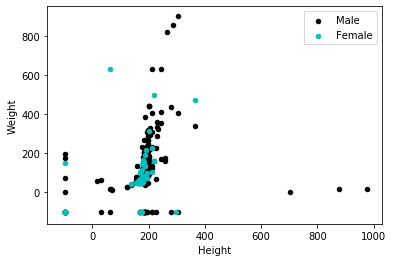

In [175]:
male_hero = df_comb[df_comb['Gender'] == 'Male']
female_hero = df_comb[df_comb['Gender'] == 'Female']

ax = male_hero.plot.scatter(x='Height', y='Weight', c='k', label='Male')
female_hero.plot.scatter(x='Height', y='Weight', c='c', label='Female', ax=ax)


## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [176]:
male_heroes_df = df_comb[df_comb['Gender'] == 'Male']
female_heroes_df = df_comb[df_comb['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    if column_name == 'Weight':
        unit='kgs'
    else: unit='cms'
    plt.plot()
    dataframe[column_name].hist(bins=20)
    plt.title('Distribution of {} {} for {} Heroes'.format(column_name, unit, gender))
    plt.ylabel('Frequency')
    plt.xlabel('{} ({})'.format(column_name, unit))
    plt.show()
    print('mean: ', dataframe[column_name].mean())
    print('median: ',dataframe[column_name].median())

In [177]:
female_heroes_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Name,,,,,,,,,,,,,,,,,,,,,
Angel Dust,Female,yellow,Mutant,Black,165.0,Marvel Comics,-,good,57.0,True,...,False,False,False,False,False,False,False,False,False,False
Angel Salvadore,Female,brown,-,Black,163.0,Marvel Comics,-,good,54.0,False,...,False,False,False,False,False,False,False,False,False,False
Angela,Female,-,-,-,-99.0,Image Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,False
Arachne,Female,blue,Human,Blond,175.0,Marvel Comics,-,good,63.0,True,...,True,False,False,False,False,False,False,False,False,False
Arclight,Female,violet,-,Purple,173.0,Marvel Comics,-,bad,57.0,False,...,False,False,False,False,False,False,False,False,False,False


In [178]:
male_heroes_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,False


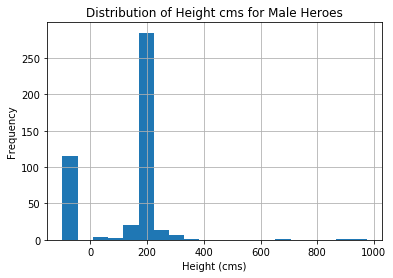

mean:  118.42699115044248
median:  183.0


In [179]:
# Male Height

show_distplot(male_heroes_df, 'Male', 'Height')

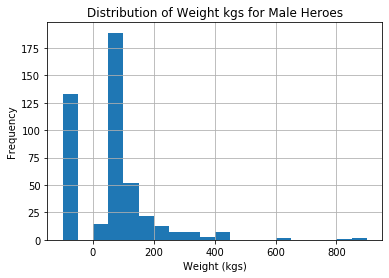

mean:  60.43141592920354
median:  79.0


In [180]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')

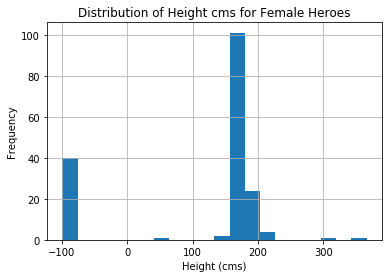

mean:  111.9396551724138
median:  168.0


In [181]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')

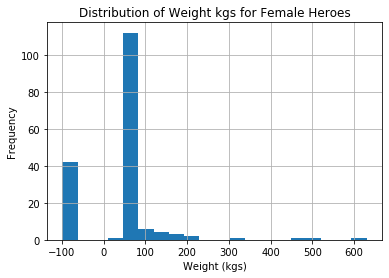

mean:  37.05747126436781
median:  54.0


In [182]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



On average female heroes are lighter and shorter. However there are about 60 female and 160 male heros we do not have height and weight data on. 

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [185]:
def top_5_powers(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
    columns = df.columns.values
    for col in columns:
        df[col] = df[col].map({'True': 1, 'False': 0})
        
    power_counts_dict = dict(df.sum())
    
    return sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)[:5] 
    
overall_top_5 = top_5_powers(df_comb)
marvel_df = df_comb[df_comb['Publisher'] == 'Marvel Comics']
dc_df = df_comb[df_comb['Publisher'] == 'DC Comics']
print(overall_top_5)
print(top_5_powers(marvel_df))
print(top_5_powers(dc_df))

[('Super Strength', 350), ('Stamina', 281), ('Durability', 251), ('Super Speed', 241), ('Agility', 235)]
[('Super Strength', 199), ('Durability', 148), ('Stamina', 145), ('Super Speed', 132), ('Agility', 121)]
[('Super Strength', 103), ('Flight', 83), ('Stamina', 83), ('Super Speed', 75), ('Agility', 68)]


In [186]:
#looks like flight is a top power in dc comics which is more rare comparable to the entire hero univers

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [190]:
df_comb.shape

(643, 176)

In [199]:
#1. calculate the probability of each power occuring
#2. calc the joint probabilities
#3. sort and compare

def probability(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
    columns = df.columns.values
    for col in columns:
        df[col] = df[col].map({'True': 1, 'False': 0})
        
    power_counts_dict = dict(df.sum()/dataframe.shape[0])
    return sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)

In [200]:
probability(df_comb)[0:5]
#for both independent powers to occur simultaneously you just multiple therefore these are
# the most frequent

[('Super Strength', 0.5443234836702955),
 ('Stamina', 0.4370139968895801),
 ('Durability', 0.39035769828926903),
 ('Super Speed', 0.374805598755832),
 ('Agility', 0.3654743390357698)]

In [201]:
probability(female_heroes_df)[0:5]

[('Super Strength', 0.5),
 ('Stamina', 0.3735632183908046),
 ('Agility', 0.367816091954023),
 ('Durability', 0.3333333333333333),
 ('Super Speed', 0.3275862068965517)]

In [202]:
probability(male_heroes_df)[0:5]

[('Super Strength', 0.5597345132743363),
 ('Stamina', 0.47345132743362833),
 ('Durability', 0.413716814159292),
 ('Super Speed', 0.39601769911504425),
 ('Agility', 0.3694690265486726)]

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data